# 1. Расчет коэффициентов FIR фильтров приемника ТРЦ-3 (метро)

Используются и рассчитываются 3 типа фильтров:

1. Входной широкополосный фильтр (400 - 800 Гц);
2. Узкополосные фильтры 8 и 12 Гц;
3. Фильтр нижниж частот, частота среза 14 Гц.

Фильтр тип 1 расположен на входе приемника, частота дискретизации 4кГц, порядок 100.
Фильтры тип 2 располагаются в тракте приема, после когерентного детектора, полоса
пропускания 2 Гц, порядок фильтров 100.
Фильтр тип 3 расположен в тракте приема, после перемножителей когерентного детектора.

В результате расчета формируются следующие данные:

- *.h файлы для подключению к проекту на BF538 (./Headers")
- *.png файлы для визуальной оценки параметров получившихся фильтров (./Graphics/')
- *.py файлы для подключения в проект моделирования приемника("../FIR_models")

Расчет ведет с использованием scipy.firwin (calc.py).

Ниже представлены АЧХ рассчитанных фильтров

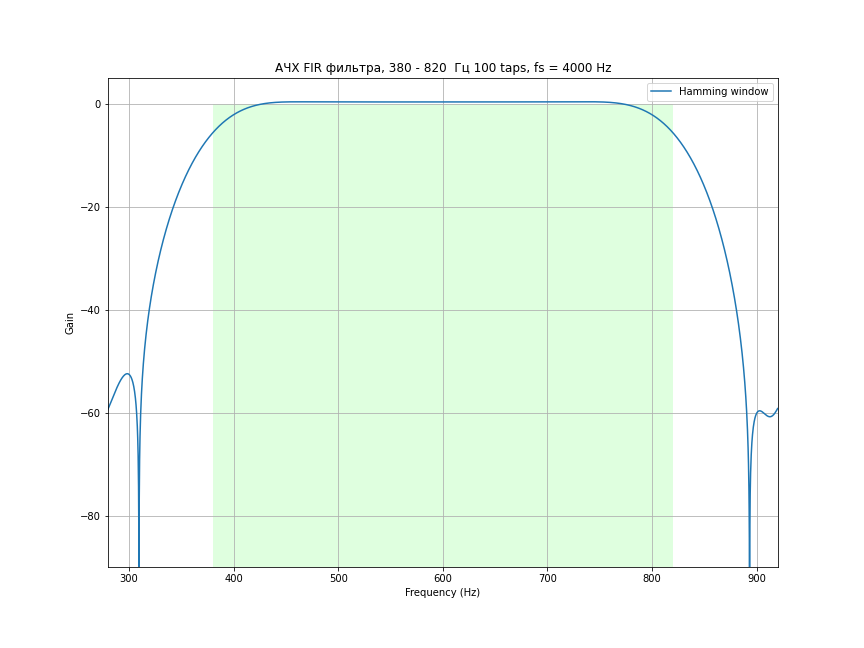

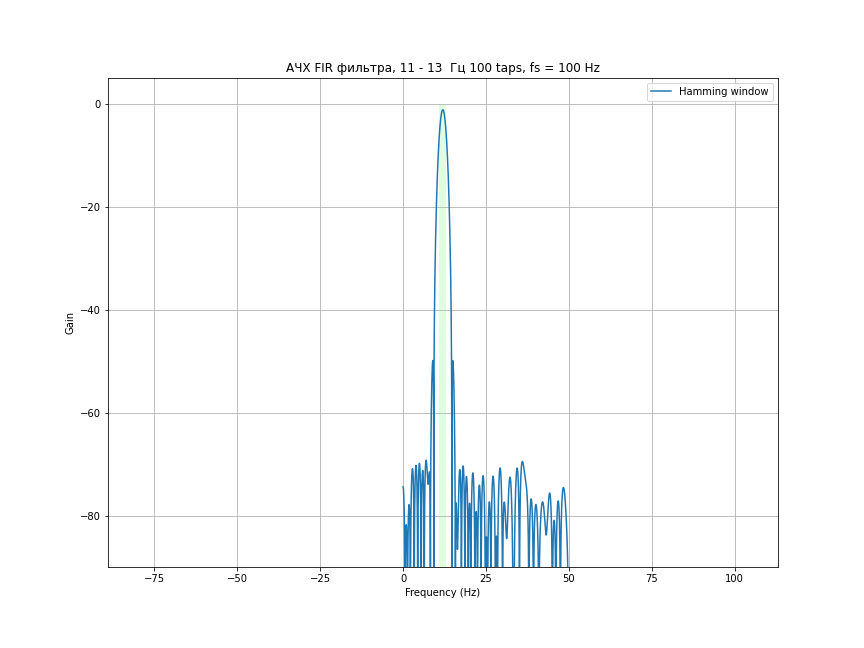

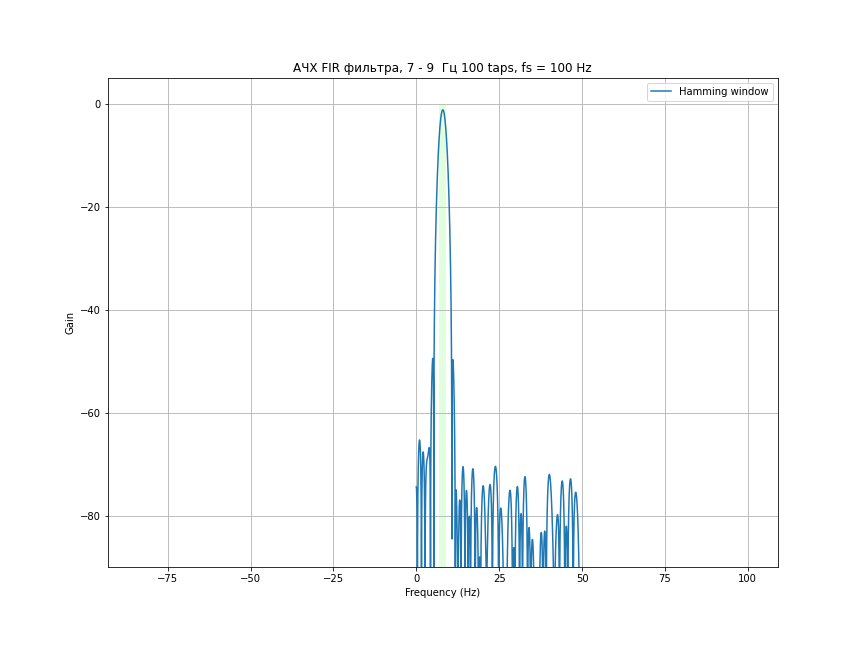

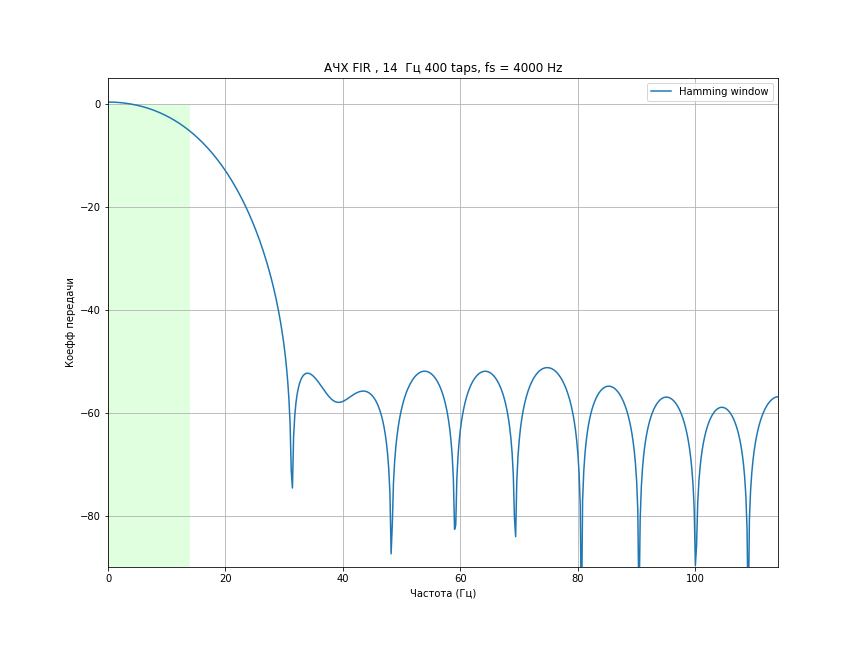

Для генерации фильтров используются следующие параметры:

In [19]:
#-общий входной фильтр (КРЛ)
freqs_KRLg = 600  # центральная частота
band_KRLg = 440  # полоса пропускания фильтра
ntaps_KRLg = 100  # порядок фильтра
fs_KRLg = 4000  # частота дискретизации

#-фильтры 8 и 12 Гц для приема КРЛ
freqs_MOD = 8, 12  # центральные частоты
band_MOD = 2  # полоса пропускания фильтра
ntaps_MOD = 100  # полоса пропускания фильтра
fs_MOD = 100  # частота дискретизации

#-ФНЧ после когерентного детектора
LPF_cut = 14  # частота среза
ntaps_LPF = 400  # порядок фильтра
fs_LPF = 4000  # частота дискретизации

Вызов функции генератора:

In [15]:
taps_KRLg = bpf_fir(ntaps_KRLg, freqs_KRLg - band_KRLg / 2, freqs_KRLg + band_KRLg / 2, fs_KRLg,"fixed")

последний аргумент определяет в каком виде будут возвращены коэффициенты:
    
- "fixed" - целочисленные;
- "" - с плавающей точкой.

Для генерации фильтров с другими параметрами следует их изменить и запустить скрипт ниже.

In [10]:
import numpy as np
from calc import *
from plot import *
from print_to_file import *
from print_to_file2 import *
import time
import os

#-общий входной фильтр (КРЛ)
freqs_KRLg = 600  # центральная частота
band_KRLg = 440  # полоса пропускания фильтра
ntaps_KRLg = 100  # порядок фильтра
fs_KRLg = 4000  # частота дискретизации

#-фильтры 8 и 12 Гц для приема КРЛ
freqs_MOD = 8, 12  # центральные частоты
band_MOD = 2  # полоса пропускания фильтра
ntaps_MOD = 100  # полоса пропускания фильтра
fs_MOD = 100  # частота дискретизации

#-ФНЧ после когерентного детектора
LPF_cut = 14  # частота среза
ntaps_LPF = 400  # порядок фильтра
fs_LPF = 4000  # частота дискретизации

#--------------------------------------------------------------------------
start_time = time.time()

##-Очистка каталогов для генерации результатов
cat = ['./Graphics/', "./Headers", "../FIR_models", "./FIR_models"]

[os.system("rm -rf " + cat[i]) for i in range(len(cat))]
[os.mkdir(cat[i]) for i in range(len(cat))]

#--------------------------------------------------------------------------
#-расчет и формирование *.h файлов группового входных фильтра-КРЛ----------
taps_KRLg = bpf_fir(ntaps_KRLg, freqs_KRLg - band_KRLg / 2, freqs_KRLg + band_KRLg / 2, fs_KRLg,"fixed")

prn_headers(taps_KRLg, freqs_KRLg, len(taps_KRLg), fs_KRLg, '') # *.h файлов
prn_model_files(taps_KRLg, freqs_KRLg, len(taps_KRLg), fs_KRLg, '') # *.py файлы
plot_fr(taps_KRLg, freqs_KRLg, band_KRLg, ntaps_KRLg, fs_KRLg, '') # графики АЧХ

#-расчет и формирование *.h файлов фильтров-8 и 12 Гц---------------------
for i in range(len(freqs_MOD)):
    taps_MOD = bpf_fir(ntaps_MOD, freqs_MOD[i] - band_MOD / 2,
                       freqs_MOD[i] + band_MOD / 2, fs_MOD,"fixed")

    prn_headers(taps_MOD, freqs_MOD[i], len(taps_MOD), fs_MOD, '')  # *.h файлов
    prn_model_files(taps_MOD, freqs_MOD[i], len(taps_MOD), fs_MOD, '')  # *.py файлов
    plot_fr(taps_MOD, freqs_MOD[i], band_MOD, ntaps_MOD, fs_MOD, '')  # графики АЧХ

#-расчет и формирование *.h файлов фильтра низких частот (ФНЧ)------------
taps_LPF = lpf_fir(ntaps_LPF, LPF_cut, fs_LPF,"fixed")

prn_headers(taps_LPF, LPF_cut, len(taps_LPF), fs_LPF, 'L')  # *.h файлов
prn_model_files(taps_LPF, LPF_cut, len(taps_LPF), fs_LPF, '')  # *.py файлов
plot_fr2(taps_LPF, LPF_cut, ntaps_LPF, fs_LPF, 'L')  # графики АЧХ

os.system("rm -rf ../FIR_models/")
os.system("cp -R ./FIR_models/  ../FIR_models/")
os.system("xviewer ./Graphics/")

print(time.time() - start_time, "seconds")


35.75099158287048 seconds


<Figure size 864x648 with 0 Axes>